***Task 2 - To Explore Supervised Machine Learning***

In this regression task we will predict the percentage of
marks that a student is expected to score based upon the
number of hours they studied. This is a simple linear
regression task as it involves just two variables.

In [3]:
#importing the neccesary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

**Check out the Data**

In [4]:
data=pd.read_csv("student_scores.csv")

In [5]:
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [7]:
data.shape

(25, 2)

In [9]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


EDA

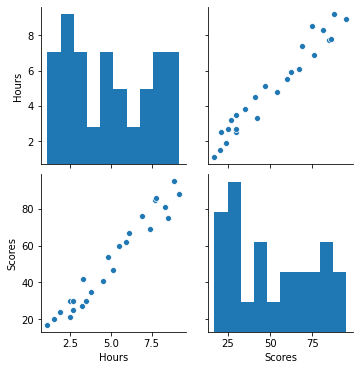

In [12]:
sns.pairplot(data)

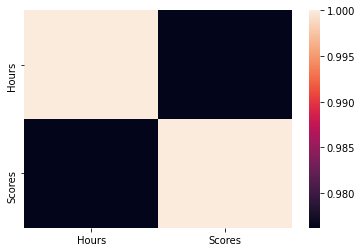

In [13]:
#By seeing the above scatter plots we can conclude that the marks and hours are positivly coorelated
sns.heatmap(data.corr())

**Training a Linear Regression Model**


Let's now begin to train out regression model! We will need to first split up our data into an X array that contains the features to train on, and a y array with the target variable, in this case the Marks.

In [20]:
X = data.iloc[:, :-1].values  
y = data.iloc[:, 1].values 

**Train Test Split**

In [96]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

**Creating and Training the Model**

---



In [97]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

**Model** **Evaluation**

In [98]:
print(model.intercept_)
print(model.coef_)

2.018160041434662
[9.91065648]


Interpreting the coefficients:

Holding all other features fixed, a 1 unit increase in Hours is associated with an increase of 9.73330705 Marks

**Predictions** **from** **our** **Model**

Let's grab predictions off our test set and see how well it did!

In [99]:
predictions = model.predict(X_test)
line = model.coef_*X+model.intercept_

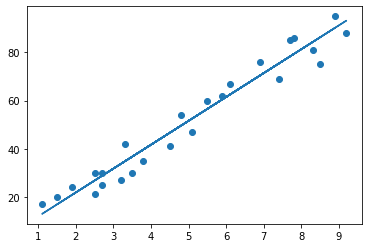

In [100]:
plt.scatter(X, y)
plt.plot(X,line)
plt.show()

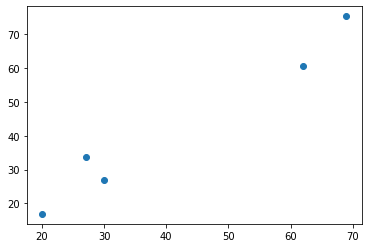

In [101]:
plt.scatter(y_test,predictions)

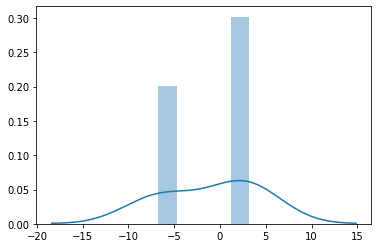

In [102]:
sns.distplot((y_test-predictions),bins=5);

**Regression Evaluation Metrics**

In [103]:
from sklearn import metrics

In [104]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 4.183859899002982
MSE: 21.598769307217456
RMSE: 4.647447612100373
